# Image Classification Model Deployment - CNN

**Raynold Panji Zulfiandi**

> Emotion Detection

> Dataset: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer

In [1]:
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.6.4


In [2]:
# cek penggunaan GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2022-10-04 05:56:37.351858: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 05:56:37.410462: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 05:56:37.511373: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 05:56:37.512227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

# Data Preparation

### Download Dataset (Google collbs)

In [ ]:
!pip install -q kaggle
from google.colab import files 

# upload kaggle.json
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

In [ ]:
!mkdir datasets
!unzip -q emotion-detection-fer.zip -d datasets
!ls datasets

### Download Datasets (kaggle notebook)

In [39]:
# !rm -rf datasets
!ls -al

total 16
drwxr-xr-x 3 root root 4096 Oct  4 07:11 .
drwxr-xr-x 5 root root 4096 Oct  4 05:56 ..
drwxr-xr-x 2 root root 4096 Oct  4 05:56 .virtual_documents
---------- 1 root root  263 Oct  4 05:56 __notebook_source__.ipynb


In [40]:
!mkdir ./datasets
!cp -r ../input/emotion-detection-fer/* ./datasets
!ls -al datasets

total 16
drwxr-xr-x 4 root root 4096 Oct  4 07:11 .
drwxr-xr-x 4 root root 4096 Oct  4 07:11 ..
drwxr-xr-x 9 root root 4096 Oct  4 07:11 test
drwxr-xr-x 9 root root 4096 Oct  4 07:12 train


In [41]:
!chmod 777 ./datasets/train
!chmod 777 ./datasets/test

!ls datasets/test

angry  disgusted  fearful  happy  neutral  sad	surprised


# Data Cleansing

In [42]:
import os

TRAINING_DIR = 'datasets/train/'
VALIDATION_DIR = 'datasets/test/'

os.listdir(TRAINING_DIR), os.listdir(VALIDATION_DIR)

(['surprised', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'angry'],
 ['surprised', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'angry'])

In [43]:
## cek jumlah dataset
def jum_data():
  train = []
  val = []
  lists = os.listdir(TRAINING_DIR)
  for cls in lists:
    train.append(len(os.listdir(os.path.join(TRAINING_DIR, cls))))
  for cls in lists:
    val.append(len(os.listdir(os.path.join(VALIDATION_DIR, cls))))
  return train, val, lists

def cek_data():
  chs = []
  train, val, lists = jum_data()
  
  msg="\n======================================"
  for i, cls in enumerate(lists):
    tot = train[i]+val[i]
    ch = round(tot*0.8)
    chs.append(ch-train[i])
    percen = ": "+str(80)+"% dari total ✓✓" if (ch==train[i]) else "-"
    msg=msg+f"\ntotal {cls}\t: {train[i]} ===> {ch} {percen}"
  msg=msg+"\ntotal : "+str(sum(train))
  
  msg=msg+"\n======================================"
  for i, cls in enumerate(lists):
    tot = train[i]+val[i]
    percen = ": "+str(20)+"% dari total ✓✓" if (round(tot*0.2)==val[i]) else "-"
    msg=msg+f"\ntotal {cls}\t: {val[i]} ===> {round(tot*0.2)} {percen}"
  msg=msg+"\ntotal : "+str(sum(val))

  msg=msg+"\n======================================"
  return msg, chs

print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3171 ===> 3202 -
total disgusted	: 436 ===> 438 -
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total happy	: 7215 ===> 7191 -
total neutral	: 4965 ===> 4958 -
total sad	: 4830 ===> 4862 -
total angry	: 3995 ===> 3962 -
total : 28709
total surprised	: 831 ===> 800 -
total disgusted	: 111 ===> 109 -
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total happy	: 1774 ===> 1798 -
total neutral	: 1233 ===> 1240 -
total sad	: 1247 ===> 1215 -
total angry	: 958 ===> 991 -
total : 7178
[31, 2, 0, -24, -7, 32, -33]


In [44]:
## hapus folder disgusted
import shutil
shutil.rmtree(os.path.join(TRAINING_DIR, 'disgusted') )
shutil.rmtree(os.path.join(VALIDATION_DIR, 'disgusted'))

os.listdir(TRAINING_DIR), os.listdir(VALIDATION_DIR)
print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3171 ===> 3202 -
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total happy	: 7215 ===> 7191 -
total neutral	: 4965 ===> 4958 -
total sad	: 4830 ===> 4862 -
total angry	: 3995 ===> 3962 -
total : 28273
total surprised	: 831 ===> 800 -
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total happy	: 1774 ===> 1798 -
total neutral	: 1233 ===> 1240 -
total sad	: 1247 ===> 1215 -
total angry	: 958 ===> 991 -
total : 7067
[31, 0, -24, -7, 32, -33]


In [45]:
## pindahkan train test gambar agar sesuai kriteria 80/20

import random 

for i, dir in enumerate(jum_data()[2]):
  source = None
  dest = None

  if (cek_data()[1][i])<0:
    source = os.path.join(TRAINING_DIR, dir)
    dest = os.path.join(VALIDATION_DIR, dir)
  elif cek_data()[1][i]>0:
    source = os.path.join(VALIDATION_DIR, dir)
    dest = os.path.join(TRAINING_DIR, dir)
  
  if source==None:
    continue
  print("\n"+source+" ====> "+dest)
  files = os.listdir(source)

  for file_name in random.sample(files, abs(cek_data()[1][i])):
    shutil.move(os.path.join(source, file_name), os.path.join(dest, "mov_"+file_name))
    print(file_name+" moved")



datasets/test/surprised ====> datasets/train/surprised
im28.png moved
im812.png moved
im127.png moved
im246.png moved
im109.png moved
im526.png moved
im287.png moved
im571.png moved
im685.png moved
im469.png moved
im278.png moved
im576.png moved
im785.png moved
im314.png moved
im617.png moved
im340.png moved
im602.png moved
im312.png moved
im244.png moved
im623.png moved
im254.png moved
im274.png moved
im304.png moved
im81.png moved
im359.png moved
im44.png moved
im225.png moved
im199.png moved
im764.png moved
im677.png moved
im10.png moved

datasets/train/happy ====> datasets/test/happy
im5559.png moved
im6024.png moved
im5862.png moved
im1483.png moved
im2890.png moved
im2212.png moved
im1321.png moved
im3146.png moved
im2143.png moved
im4566.png moved
im5941.png moved
im2177.png moved
im6884.png moved
im6675.png moved
im193.png moved
im2083.png moved
im3034.png moved
im2138.png moved
im5190.png moved
im532.png moved
im6364.png moved
im4863.png moved
im7197.png moved
im1141.png move

In [46]:
print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total happy	: 7191 ===> 7191 : 80% dari total ✓✓
total neutral	: 4958 ===> 4958 : 80% dari total ✓✓
total sad	: 4862 ===> 4862 : 80% dari total ✓✓
total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total : 28272
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total happy	: 1798 ===> 1798 : 20% dari total ✓✓
total neutral	: 1240 ===> 1240 : 20% dari total ✓✓
total sad	: 1215 ===> 1215 : 20% dari total ✓✓
total angry	: 991 ===> 991 : 20% dari total ✓✓
total : 7068
[0, 0, 0, 0, 0, 0]


In [47]:
## Undersampling class happy

avg_undersampling = (sum(jum_data()[0]) / len(jum_data()[0])) / 7191  # persentase 0.6553

train_happy = 7191 - round(7191 * avg_undersampling)  # total train - 65,53% dari total train data: 4712
val_happy = 1798 - round(1798 * avg_undersampling)    # total val - 65,53% dari total val data: 1178

train_dir = os.path.join(TRAINING_DIR, 'happy')
val_dir = os.path.join(VALIDATION_DIR, 'happy')

for i, file_name in enumerate(random.sample(os.listdir(train_dir), train_happy)):
  os.remove(os.path.join(train_dir, file_name))
print(str(train_happy)+" files removed ")

for i, file_name in enumerate(random.sample(os.listdir(val_dir), val_happy)):
  os.remove(os.path.join(val_dir, file_name))
print(str(val_happy)+" files removed ")

2479 files removed 
620 files removed 


In [48]:
print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total happy	: 4712 ===> 4712 : 80% dari total ✓✓
total neutral	: 4958 ===> 4958 : 80% dari total ✓✓
total sad	: 4862 ===> 4862 : 80% dari total ✓✓
total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total : 25793
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total happy	: 1178 ===> 1178 : 20% dari total ✓✓
total neutral	: 1240 ===> 1240 : 20% dari total ✓✓
total sad	: 1215 ===> 1215 : 20% dari total ✓✓
total angry	: 991 ===> 991 : 20% dari total ✓✓
total : 6448
[0, 0, 0, 0, 0, 0]


In [84]:
jum_data()[2][2:5]

['happy', 'neutral', 'sad']

In [83]:
a = (sum(jum_data()[0][2:5]) / len(jum_data()[0][2:5])) - (jum_data()[0][0]+jum_data()[0][1]+jum_data()[0][5])//3
a

1091.0

In [81]:
dd = 4862 - c
dd

3771.0

In [85]:

train_sampling = (sum(jum_data()[0][2:5]) / len(jum_data()[0][2:5])) - (jum_data()[0][0]+jum_data()[0][1]+jum_data()[0][5])//3  # rata2 data train yg besar - rata2 train yg kecil: 882
val_sampling = (sum(jum_data()[1][2:5]) / len(jum_data()[1][2:5])) - (jum_data()[1][0]+jum_data()[1][1]+jum_data()[1][5])//3 

train_sampling, val_sampling

(1091.0, 273.0)

In [93]:
## Undersampling class sad, happy, dan neutral
train_sampling = (sum(jum_data()[0][2:5]) / len(jum_data()[0][2:5])) - (jum_data()[0][0]+jum_data()[0][1]+jum_data()[0][5])//3  # rata2 data train yg besar - rata2 train yg kecil: 1091
val_sampling = (sum(jum_data()[1][2:5]) / len(jum_data()[1][2:5])) - (jum_data()[1][0]+jum_data()[1][1]+jum_data()[1][5])//3    # rata2 data val yg besar - rata2 val yg kecil: 273

# remove sebagian data pada data happy, neutral, dan sad
for u_dir in ['happy', 'neutral', 'sad']:
  train_dir = os.path.join(TRAINING_DIR, u_dir)
  val_dir = os.path.join(VALIDATION_DIR, u_dir)
  for i, file_name in enumerate(random.sample(os.listdir(train_dir), round(train_sampling))):
    os.remove(os.path.join(train_dir, file_name))
    continue
  print(f"{i+1} train {u_dir} files removed ")
  for i, file_name in enumerate(random.sample(os.listdir(val_dir), round(val_sampling))):
    os.remove(os.path.join(val_dir, file_name))
    continue
  print(f"{i+1} val {u_dir} files removed ")

1091 train happy files removed 
273 val happy files removed 
1091 train neutral files removed 
273 val neutral files removed 
1091 train sad files removed 
273 val sad files removed 


In [94]:
print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total happy	: 3621 ===> 3621 : 80% dari total ✓✓
total neutral	: 3867 ===> 3867 : 80% dari total ✓✓
total sad	: 3771 ===> 3770 -
total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total : 22520
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total happy	: 905 ===> 905 : 20% dari total ✓✓
total neutral	: 967 ===> 967 : 20% dari total ✓✓
total sad	: 942 ===> 943 -
total angry	: 991 ===> 991 : 20% dari total ✓✓
total : 5629
[0, 0, 0, 0, -1, 0]


In [95]:
source = os.path.join(TRAINING_DIR, 'sad')
dest = os.path.join(VALIDATION_DIR, 'sad')
file = random.sample(os.listdir(source), 1)[0]

shutil.move(os.path.join(source, file), os.path.join(dest, "mov_"+file))
# print(os.path.join(source, file))

print(cek_data()[0])
print(cek_data()[1])


total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total happy	: 3621 ===> 3621 : 80% dari total ✓✓
total neutral	: 3867 ===> 3867 : 80% dari total ✓✓
total sad	: 3770 ===> 3770 : 80% dari total ✓✓
total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total : 22519
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total happy	: 905 ===> 905 : 20% dari total ✓✓
total neutral	: 967 ===> 967 : 20% dari total ✓✓
total sad	: 943 ===> 943 : 20% dari total ✓✓
total angry	: 991 ===> 991 : 20% dari total ✓✓
total : 5630
[0, 0, 0, 0, 0, 0]


In [109]:
## hapus class surprised dan fearful
shutil.rmtree(os.path.join(TRAINING_DIR, 'surprised') )
shutil.rmtree(os.path.join(VALIDATION_DIR, 'surprised'))

shutil.rmtree(os.path.join(TRAINING_DIR, 'neutral'))
shutil.rmtree(os.path.join(VALIDATION_DIR, 'neutral'))

shutil.rmtree(os.path.join(TRAINING_DIR, 'angry'))
shutil.rmtree(os.path.join(VALIDATION_DIR, 'angry'))

print(cek_data()[0])
print(cek_data()[1])


total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total happy	: 3621 ===> 3621 : 80% dari total ✓✓
total sad	: 3770 ===> 3770 : 80% dari total ✓✓
total : 11488
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total happy	: 905 ===> 905 : 20% dari total ✓✓
total sad	: 943 ===> 943 : 20% dari total ✓✓
total : 2872
[0, 0, 0]


In [ ]:
## Undersampling class sad, happy, dan neutral
train_sampling = (sum(jum_data()[0][0:3]) / len(jum_data()[0][0:3])) - jum_data()[0][3]  # rata2 sad, happy, neutral - total data train angry: 882
val_sampling = (sum(jum_data()[1][0:3]) / len(jum_data()[1][0:3])) - jum_data()[1][3]    # rata2 sad, happy, neutral - total data val angry: 220

for u_dir in ['sad', 'happy', 'neutral']:
  train_dir = os.path.join(TRAINING_DIR, u_dir)
  val_dir = os.path.join(VALIDATION_DIR, u_dir)
  for i, file_name in enumerate(random.sample(os.listdir(train_dir), round(train_sampling))):
    os.remove(os.path.join(train_dir, file_name))
  print(f"{train_sampling} train {u_dir} files removed ")
  for i, file_name in enumerate(random.sample(os.listdir(val_dir), round(val_sampling))):
    os.remove(os.path.join(val_dir, file_name))
  print(f"{val_sampling} val {u_dir} files removed ")

In [ ]:
print(cek_data()[0])
print(cek_data()[1])

In [ ]:
source = os.path.join(VALIDATION_DIR, 'neutral')
dest = os.path.join(TRAINING_DIR, 'neutral')
file = random.sample(os.listdir(source), 1)[0]

shutil.move(os.path.join(source, file), os.path.join(dest, "mov_"+file))
# print(os.path.join(source, file))

print(cek_data()[0])
print(cek_data()[1])

# Data Preprocessing

In [110]:
## Augmentasi data

from keras.preprocessing.image import ImageDataGenerator
training_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,  
)

img_height = 150
img_width = 150
batch_size = 25

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    target_size=(img_height, img_width), 
    batch_size=batch_size,
    color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(      
    VALIDATION_DIR,    
    class_mode='categorical',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
)

Found 11488 images belonging to 3 classes.
Found 2872 images belonging to 3 classes.


In [111]:
train_generator.class_indices

{'fearful': 0, 'happy': 1, 'sad': 2}

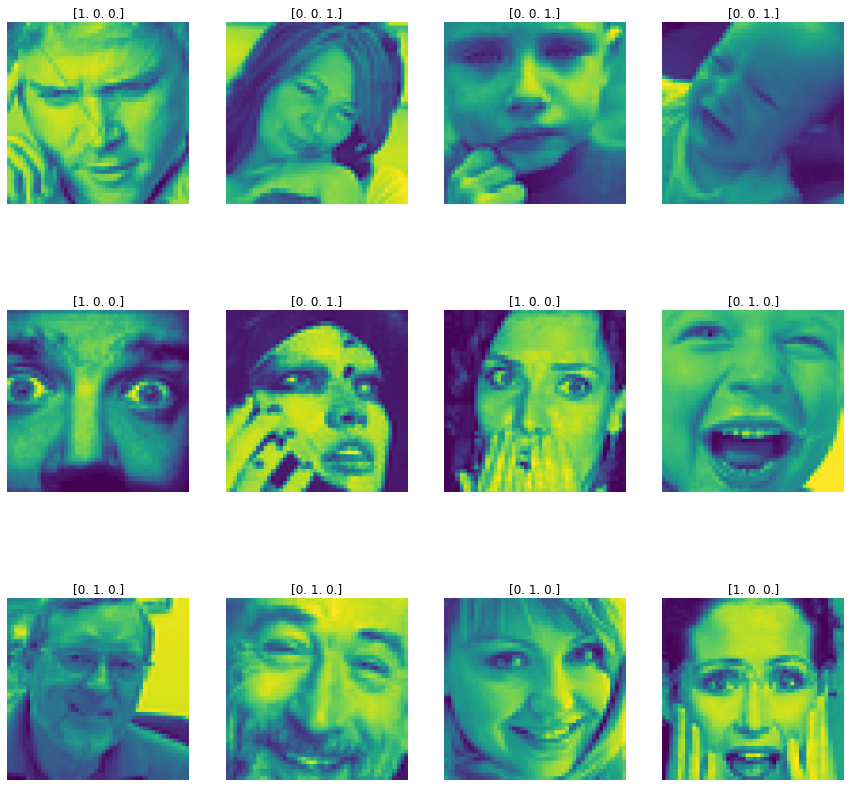

In [112]:
## Plot gambar

import matplotlib.pylab as plt

plt.figure(figsize=[15,15])
for i in range(12):
    x, y = random.choice(train_generator)
    plt.subplot(3, 4, i+1)
    for im, lb in zip(x, y):
        plt.title(str(lb))
        plt.imshow(im)
        plt.axis('off')
plt.show()

# Training

In [117]:
## build architecture
num_cls = len(train_generator.class_indices)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), padding="same", activation="relu", input_shape=(img_height, img_width, 1), use_bias=True),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128,(3,3), padding="same", activation="relu", use_bias=True),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.MaxPooling2D(2,2),
    
  tf.keras.layers.Conv2D(64,(3,3), padding="same", activation="relu", use_bias=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.MaxPooling2D(2,2),
  
#   tf.keras.layers.Conv2D(256,(3,3), padding="same", activation="relu", use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
#   tf.keras.layers.Dropout(0.4),
#   tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(512, activation="relu", use_bias=True),
  tf.keras.layers.Dropout(0.3),
    
  tf.keras.layers.Dense(128, activation="relu", use_bias=True),
  tf.keras.layers.Dropout(0.2),
    
#   tf.keras.layers.Dense(64, activation="relu", use_bias=True),
#   tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Dense(num_cls, activation="softmax")
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 150, 150, 128)     1280      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
dropout_13 (Dropout)         (None, 75, 75, 128)       0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 37, 37, 64)        73792     
_________________________________________________________________
dropout_14 (Dropout)         (None, 37, 37, 64)       

In [118]:
## compile model

opt_adam = tf.optimizers.Adam(learning_rate=0.01)
opt_rms = tf.optimizers.RMSprop(learning_rate=1e-3)
opt_sgd = tf.optimizers.SGD(learning_rate=1e-2)

model.compile(
  loss = 'categorical_crossentropy',
  optimizer = opt_sgd,
  metrics = ['accuracy']
)

In [119]:
## define callbacks

early_stopping = tf.keras.callbacks.EarlyStopping(
  monitor = "val_accuracy",
  patience = 5,
  verbose = 0,
  mode = "auto",
  restore_best_weights=True
)

callbacks = [early_stopping]

In [120]:
## Train model

STEP_PER_EPOCH = train_generator.n // train_generator.batch_size
VALIDATION_STEPS = validation_generator.n // validation_generator.batch_size

with tf.device("/device:GPU:0"):
  history = model.fit(
      train_generator,
      steps_per_epoch = STEP_PER_EPOCH,
      epochs = 35,
      validation_data = validation_generator,
      validation_steps = VALIDATION_STEPS,
      verbose = 1,
      callbacks = callbacks
  )

Epoch 1/35
459/459 [==============================] - 29s 62ms/step - loss: 1.0897 - accuracy: 0.3835 - val_loss: 1.0798 - val_accuracy: 0.4681
Epoch 2/35
459/459 [==============================] - 27s 60ms/step - loss: 1.0685 - accuracy: 0.4343 - val_loss: 1.0485 - val_accuracy: 0.4565
Epoch 3/35
459/459 [==============================] - 28s 60ms/step - loss: 1.0392 - accuracy: 0.4676 - val_loss: 1.0328 - val_accuracy: 0.4965
Epoch 4/35
459/459 [==============================] - 27s 59ms/step - loss: 1.0125 - accuracy: 0.4850 - val_loss: 1.0194 - val_accuracy: 0.5018
Epoch 5/35
459/459 [==============================] - 28s 60ms/step - loss: 0.9877 - accuracy: 0.5093 - val_loss: 0.9756 - val_accuracy: 0.5460
Epoch 6/35
459/459 [==============================] - 28s 61ms/step - loss: 0.9651 - accuracy: 0.5271 - val_loss: 1.0061 - val_accuracy: 0.4968
Epoch 7/35
459/459 [==============================] - 28s 60ms/step - loss: 0.9457 - accuracy: 0.5397 - val_loss: 0.9817 - val_accuracy:

In [121]:
## model evaluate

loss, acc = model.evaluate(validation_generator)
print(f"valid accuracy: {acc} \nvalid loss: {loss}")

115/115 [==============================] - 2s 19ms/step - loss: 0.8747 - accuracy: 0.6372
valid accuracy: 0.6371866464614868 
valid loss: 0.8746981620788574


# Evaluation Model

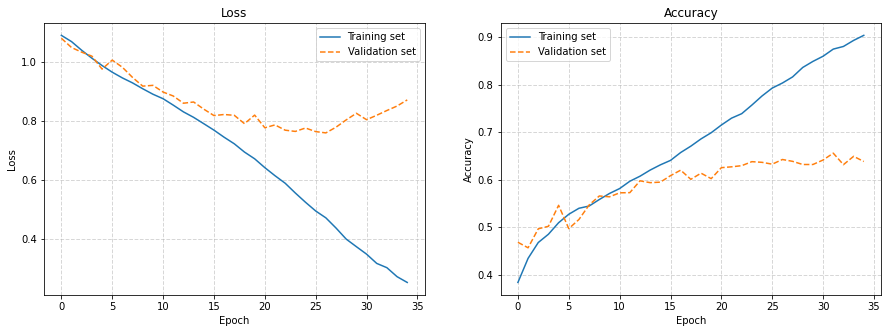

In [122]:
## Plot accuracy dan Loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(acc, label='Training set')
plt.plot(val_acc, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.show()

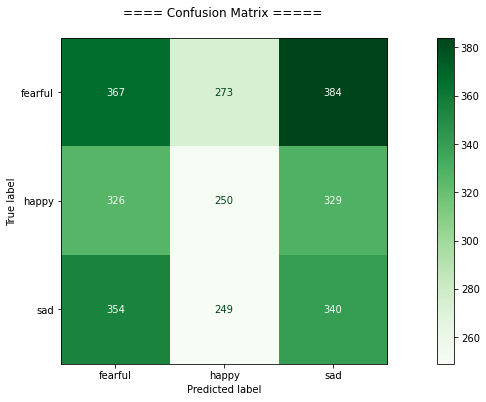


=============== Classification Report ================
              precision    recall  f1-score   support

     fearful       0.35      0.36      0.35      1024
       happy       0.32      0.28      0.30       905
         sad       0.32      0.36      0.34       943

    accuracy                           0.33      2872
   macro avg       0.33      0.33      0.33      2872
weighted avg       0.33      0.33      0.33      2872



In [123]:
## Plot Confusion Matrix dan Classification Report

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

labels_list = list(train_generator.class_indices.keys())


fig, ax = plt.subplots(figsize=(18, 6))
cm = confusion_matrix(validation_generator.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_list)
disp.plot(cmap=plt.cm.Greens, ax=ax)
plt.title("==== Confusion Matrix ===== \n")
plt.show()


print("\n=============== Classification Report ================")
print(classification_report(validation_generator.classes, y_pred, target_names=labels_list))

# Deployment

In [ ]:
## save model keras *.h5

if os.path.exists('model')==False:
  os.mkdir('model')

model.save_weights("model/model_weights.h5")
model.save("model/model.h5")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Convert Model keras ke tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

## save model *.tflite
with open('model/model.tflite', 'wb') as f:
  f.write(tflite_model)